In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/rushi/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
2024-03-16 11:45:37.465733: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-16 11:45:37.504003: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-16 11:45:37.739134: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to r

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

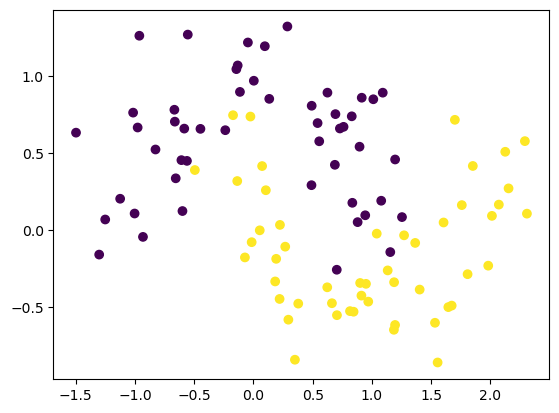

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


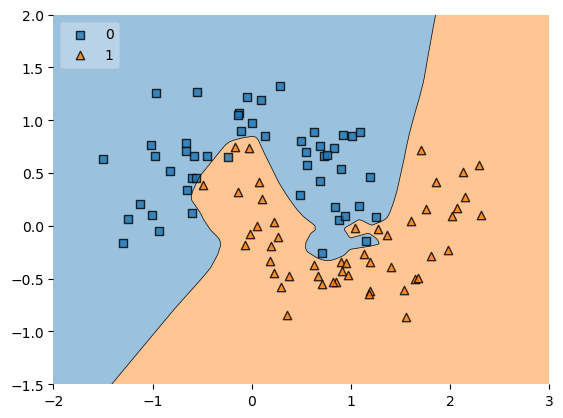

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

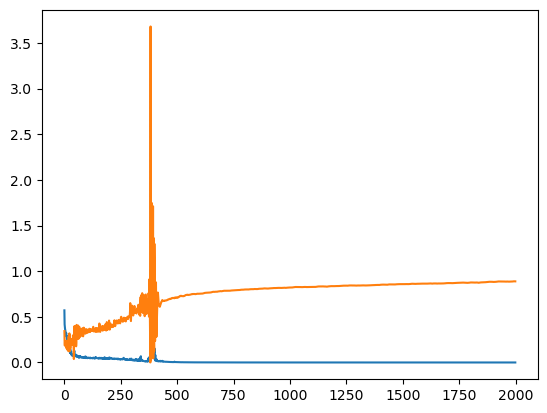

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

Making Model with L1 regularization

In [8]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 


 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


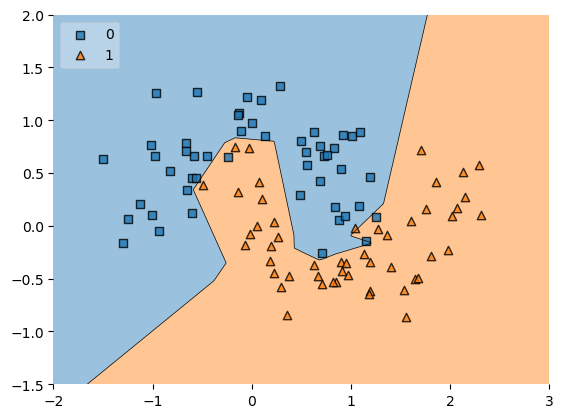

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

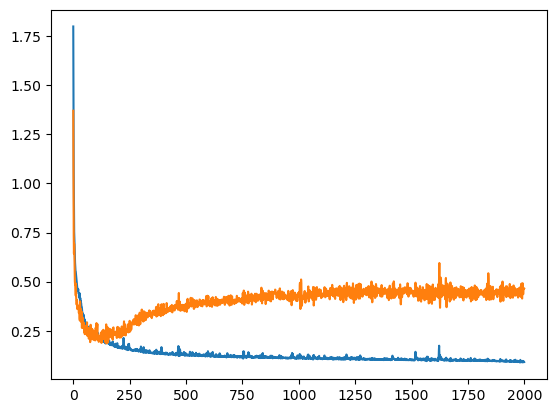

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [12]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<AxesSubplot:>

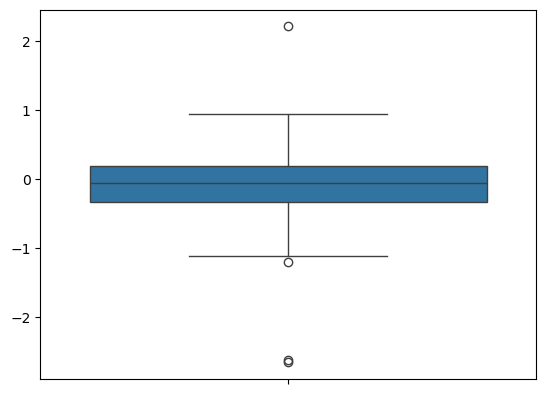

In [13]:
sns.boxplot(model1_weight_layer1)

<AxesSubplot:>

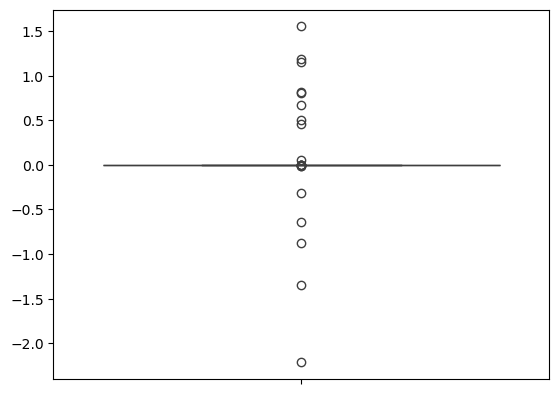

In [14]:
sns.boxplot(model2_weight_layer1)

In [15]:
model1_weight_layer1.min()

-2.6633608

In [16]:
model2_weight_layer1.min()

-2.2145123

In [18]:
# sns.distplot(model1_weight_layer1)
# sns.distplot(model2_weight_layer1)

In [19]:
model1.get_weights()[0].reshape(256)

array([ 7.37329423e-02, -5.19210041e-01,  1.79458931e-01, -2.78139204e-01,
        1.55033976e-01,  6.40340596e-02,  4.17656153e-01, -3.11483771e-01,
       -5.22594035e-01, -8.31014663e-02,  1.46939643e-02, -3.95851761e-01,
       -3.84345114e-01, -2.03480989e-01, -5.65915048e-01, -7.63431564e-02,
        1.13500737e-01, -4.78942156e-01,  2.93832034e-01, -3.02067727e-01,
       -4.44690585e-01,  2.00510900e-02, -2.99928635e-01, -5.82710326e-01,
        2.89686143e-01,  1.98052265e-02, -4.47908193e-01, -1.62852019e-01,
        3.08705419e-01, -1.46287521e-02, -3.62137735e-01, -4.44437861e-01,
        3.73839319e-01,  3.16782027e-01, -3.98209214e-01, -2.94471413e-01,
       -4.52432752e-01, -5.30127525e-01,  1.66400094e-02,  3.19120884e-01,
       -3.50459181e-02, -4.09304410e-01, -3.52508664e-01,  9.48004518e-03,
        3.20864409e-01,  1.98800772e-01, -2.87608236e-01, -1.52211830e-01,
       -3.50407660e-01, -4.28810239e-01, -5.51088095e-01, -3.41610283e-01,
        3.94062698e-01, -